<a href="https://colab.research.google.com/github/MSyahmiAzri/OWTSResultML/blob/main/Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING CLASSIFICATION 2**


4 TYPE OF OUTPUTS:
1. MONITORING
2. MWT
3. NORMAL
4. REPAIR

**1. IMPORTING DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Replace the file ID with your own
file_id = '1fFe63sxH6kGwHdHwjweC5oUe-lv0lq6y'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_excel(link)




2. CHECKING DATA

In [ ]:
df.head()

,BIL,STATION,TEST DATE,SOURCE\nPMU/PPU/SSU,FEEDER NO,TEST FROM,CABLE ID,TEST TO,CABLE TYPE,SIZE (mm2),...,CAT1,CAT2,CAT3,CAT4,CAT5,CATEGORY DEFECT,PD TYPE,RECOMMENDATION,RECOMMENDATION (FREE TEXT),MONITORING DURATION
0,704,BANGI,2022-01-05,KJGU,6,PE TMN MEWAH INDAH,B03423,PE NG TRADING,XLPE,240MMP,...,MONITORING,MONITORING,UNHEALTHY,NORMAL,NORMAL,JOINT,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN
1,705,BANGI,2022-01-24,SEC9,2,PE BANDAR BARU BANGI 18,B06023,PE RAWATAN SISA AIR SEKSYEN 9,MIXED,240MMP/300MMP,...,NORMAL,NORMAL,HEALTHY,NORMAL,NORMAL,NO DEFECT,SCATTERED,VLF/MWT,VLF/ MWT,6 BULAN
2,706,BANGI,2022-01-24,ABBA,4,PE SG MERAB 3,B03804,PE JALAN PBP 4 PRECINT 17,XLPE,240MMP,...,MWT,REPAIR,UNHEALTHY,NORMAL,REPAIR,NO DEFECT,SCATTERED,MONITORING & RETEST,RETEST OWTS,12 BULAN
3,707,BANGI,2022-01-25,BRNG,2,PE TASEK KESUMA FASA 3B,B05132,PE TREATMENT PLANT,MIXED,240MMP/300MMP,...,MWT,REPAIR,UNHEALTHY,NORMAL,REPAIR,NO DEFECT,NO PD,MONITORING & RETEST,RETEST OWTS,12 BULAN
4,708,BANGI,2022-01-26,UPM,3,PE APARTMENT KANTAN COURT B2,B07766,PE KG AMAN,XLPE,240MMP,...,MONITORING,MONITORING,UNHEALTHY,NORMAL,NORMAL,JOINT,CONCENTRATION,MONITORING & RETEST,RETEST OWTS,6 BULAN


3. CHECKING DATA DIMENSIONS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   BIL                         3887 non-null   object        
 1   STATION                     3890 non-null   object        
 2   TEST DATE                   3890 non-null   datetime64[ns]
 3   SOURCE
PMU/PPU/SSU          3889 non-null   object        
 4   FEEDER NO                   3890 non-null   object        
 5   TEST FROM                   3890 non-null   object        
 6   CABLE ID                    3890 non-null   object        
 7   TEST TO                     3890 non-null   object        
 8   CABLE TYPE                  3890 non-null   object        
 9   SIZE (mm2)                  3890 non-null   object        
 10  CORE                        3890 non-null   object        
 11  LENGTH(m)                   3890 non-null   int64       

4. SCATTERPLOT

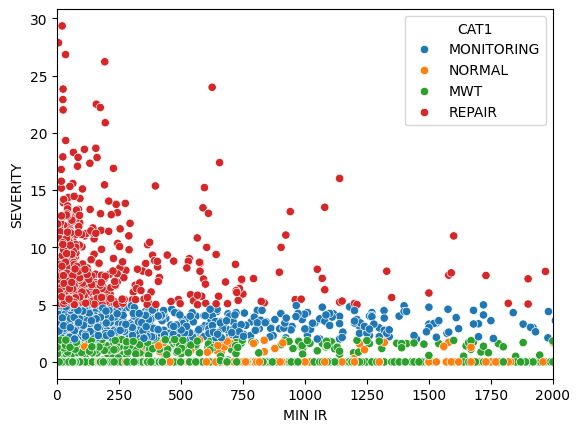

In [ ]:
sns.scatterplot(x='MIN IR', y='SEVERITY', hue='CAT1', data=df)
plt.xlim([0, 2000])
#plt.ylim([0,50000])
plt.show()

5. PIVOT TABLE

In [ ]:
pivot_table = df.pivot_table(index=['ANALISA IR & PIDAR'], columns=['CAT2'], aggfunc='size', fill_value=0)
print(pivot_table)


CAT2                     MONITORING  NORMAL  REPAIR
ANALISA IR & PIDAR                                 
DAR<1                            75       0     188
DAR<1,IR<100                     63       0      93
DAR<1,IR<100,UNBALANCED          78       0     209
DAR<1,UNBALANCED                 83       0     209
IR<100                          190       0     448
IR<100,UNBALANCED               156       0     405
OK                              326     367     395
UNBALANCED                      196       0     409


5. BUILDING MACHINE LEARNING WITH RESULTS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame
features = df[['MIN IR','LENGTH(m)','% UNBALANCED','MIN DAR']]
target = df['CAT1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Standardize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Create a Random Forest classifier
model = RandomForestClassifier()
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print(cr)

Accuracy: 0.5295629820051414
Confusion Matrix:
[[ 69 112  23  28]
 [ 58 238   0  31]
 [  6   0  63   5]
 [ 47  50   6  42]]
              precision    recall  f1-score   support

  MONITORING       0.38      0.30      0.33       232
         MWT       0.59      0.73      0.65       327
      NORMAL       0.68      0.85      0.76        74
      REPAIR       0.40      0.29      0.33       145

    accuracy                           0.53       778
   macro avg       0.51      0.54      0.52       778
weighted avg       0.50      0.53      0.51       778



6. TESTING THE MODEL WITH 2024 DATA

In [ ]:
# Assuming 'new_df' is your new DataFrame with the same structure as 'df'

file_id_new = '1EgsiIstrR0Z1tk9WazQ6gj7NVr6XVe6A'
link_new = f'https://drive.google.com/uc?id={file_id_new}'
new_df = pd.read_excel(link_new)

#from sklearn.preprocessing import LabelEncoder , OneHotEncoder
#labelencoder_x=LabelEncoder()
#new_df['KATERGORI ANALISA KABEL']=labelencoder_x.fit_transform(new_df['KATERGORI ANALISA KABEL'])
new_features = new_df[['MIN IR','LENGTH(m)','% UNBALANCED','MIN DAR']]
new_target = new_df['CAT1']

# Make predictions on the new dataset using the trained model
new_y_pred = model.predict(new_features)


# Evaluate the model on the new dataset
new_accuracy = accuracy_score(new_target, new_y_pred)
print("Accuracy on new dataset:", new_accuracy)

# Generate the confusion matrix for the new dataset
new_cm = confusion_matrix(new_target, new_y_pred)

# Print the confusion matrix for the new dataset
print("Confusion Matrix on new dataset:")
print(new_cm)

new_cr = classification_report(new_target, new_y_pred)
print(new_cr)

Accuracy on new dataset: 0.4586255259467041
Confusion Matrix on new dataset:
[[ 59  89  12  38]
 [ 66 189   0  26]
 [ 11   0  19   3]
 [ 55  79   7  60]]
              precision    recall  f1-score   support

  MONITORING       0.31      0.30      0.30       198
         MWT       0.53      0.67      0.59       281
      NORMAL       0.50      0.58      0.54        33
      REPAIR       0.47      0.30      0.37       201

    accuracy                           0.46       713
   macro avg       0.45      0.46      0.45       713
weighted avg       0.45      0.46      0.45       713



7. EXPORTING 2024 DATA TEST

In [ ]:
result_df = pd.DataFrame({
    'STATION': new_df['STATION'],
    'LINK NO' : new_df['CABLE ID'],
    '% UNBALANCED': new_df['% UNBALANCED'],
    'ANALISA PIDAR': new_df['ANALISA IR & PIDAR'],
    'MIN IR': new_df['MIN IR'],
    'LENGTH(m)': new_df['LENGTH(m)'],
    'RL': new_df['RL'],
    'MIN DAR': new_df['MIN DAR'],
    'SEVERITY': new_df['SEVERITY'],
    'CAT1': new_df['CAT1'],
    'Actual Kategori': new_target,
    'Predicted Kategori': new_y_pred
})

result_df

,STATION,LINK NO,% UNBALANCED,ANALISA PIDAR,MIN IR,LENGTH(m),RL,MIN DAR,SEVERITY,CAT1,Actual Kategori,Predicted Kategori
0,KLANG,K20324,0.310493,IR<100,32.2,3220,103.6840,1.09,5.108,REPAIR,REPAIR,MWT
1,KLANG,K24478,0.919641,"DAR<1,UNBALANCED",626.0,1608,1006.6080,0.91,0.7112,MWT,MWT,MWT
2,KLANG,K24765,0.417722,DAR<1,552.0,364,200.9280,0.94,0,MWT,MWT,MWT
3,KLANG,K14103,0.668750,UNBALANCED,1060.0,280,296.8000,1.01,3.9745,MONITORING,MONITORING,MWT
4,KLANG,K14104,0.462451,OK,4080.0,416,1697.2800,1.04,0,MWT,MWT,MWT
...,...,...,...,...,...,...,...,...,...,...,...,...
708,PUCHONG,J11012,0.623762,UNBALANCED,1140.0,633,721.6200,1.02,3.4,MONITORING,MONITORING,MWT
709,PUCHONG,J50915,0.406294,OK,8490.0,2793,23712.5700,1.03,2.3,MONITORING,MONITORING,MWT
710,PUCHONG,J49125,0.263846,DAR<1,9570.0,327,3129.3900,0.94,2.3,MONITORING,MONITORING,MWT
711,PUCHONG,J40014,0.638554,"DAR<1,UNBALANCED",1500.0,674,1011.0000,0.89,1.2,MWT,MWT,MWT
